System recommendation aplikasi play store

Oleh : Aditya Septiawan

dataset : https://www.kaggle.com/datasets/whenamancodes/play-store-apps

## Data Understanding


memahami cakupan dan jumlah data unik yang ada dalam kedua dataset

In [1]:
import pandas as pd

user = pd.read_csv('dataset-play-store/googleplaystore_user_reviews.csv')
apk = pd.read_csv('dataset-play-store/googleplaystore.csv')
 
print('Jumlah data pada play store: ', len(apk.App.unique()))
print('Jumlah data pada user review: ', len(user.App.unique()))



Jumlah data pada play store:  9660
Jumlah data pada user review:  1074


## Univariate Exploratory Data Analysis

menampilkan ringkasan informasi dari dataframe user

In [2]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


menampilkan statistik deskriptif pada kolom numerik dari user

In [3]:
# Tampilkan deskripsi 
user.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


menghitung jumlah nilai kosong (null) di setiap kolom pada user

In [4]:
user.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

menampilkan distribusi Sentiment Polarity pada user

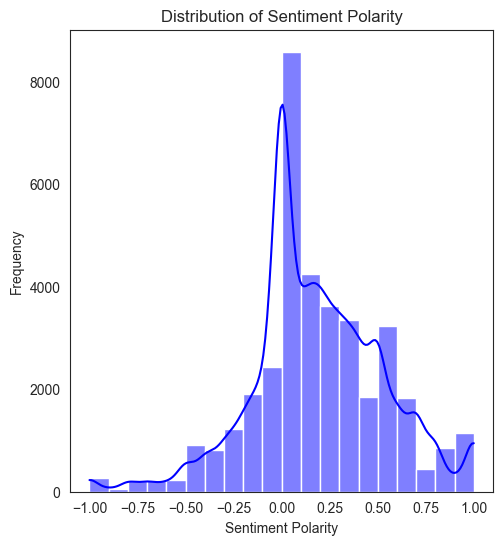

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set_style("white")

# Plot distribusi Sentiment Polarity
plt.figure(figsize=(12, 6))

# Subplot untuk Sentiment Polarity
plt.subplot(1, 2, 1)
sns.histplot(user['Sentiment_Polarity'].dropna(), kde=True, bins=20, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

menampilkan distribusi Sentiment Subjectivity pada user

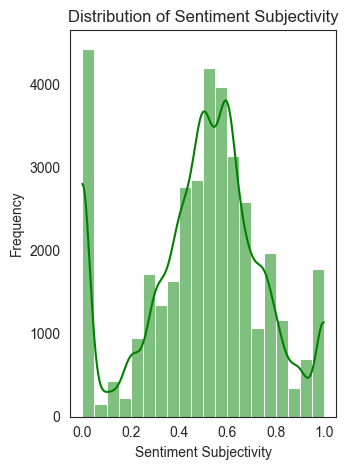

In [6]:
# Subplot untuk Sentiment Subjectivity
plt.subplot(1, 2, 2)
sns.histplot(user['Sentiment_Subjectivity'].dropna(), kde=True, bins=20, color='green')
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')

# Menampilkan plot
plt.tight_layout()
plt.show()

memberikan ringkasan informasi pada apk

In [7]:
apk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


mengubah semua spasi di nama kolom menjadi underscore _

In [8]:
apk.columns = apk.columns.str.replace(' ', '_')

menampilkan statistik deskriptif pada kolom numerik dari user

In [9]:
apk.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


menghitung jumlah nilai kosong (null) di setiap kolom pada user

In [45]:
apk.isnull().sum()

App            0
Category       0
Rating      1474
Genres         0
dtype: int64

menampilkan distribusi Rating pada apk

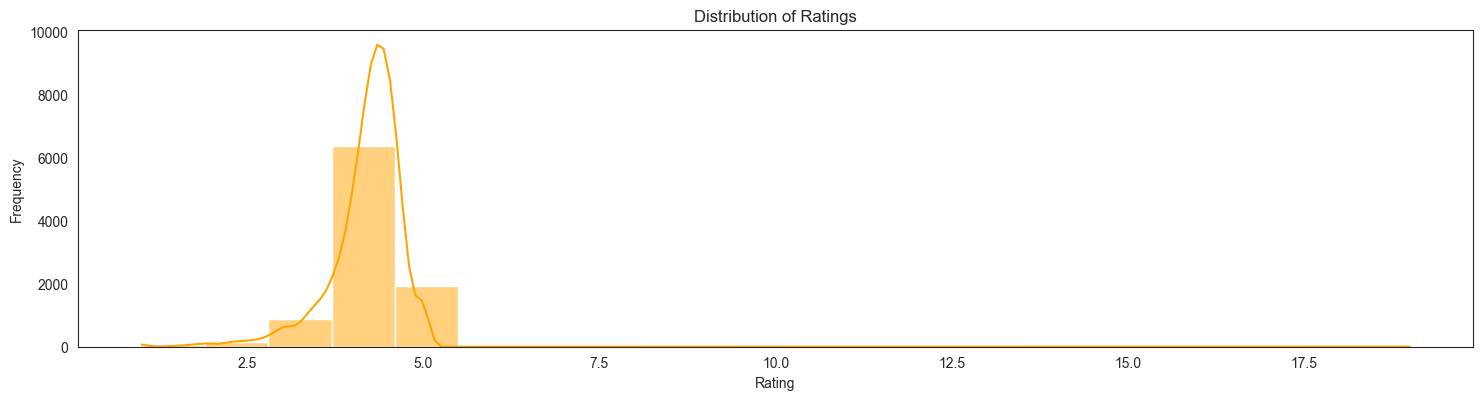

In [10]:
plt.figure(figsize=(18, 14))
plt.subplot(3, 1, 2)
sns.histplot(apk['Rating'].dropna(), kde=True, bins=20, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Tampilkan plot
plt.show()

menampilkan distribusi Genres pada user

C:\Users\jstwy\AppData\Local\Temp\ipykernel_25072\3125518875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts.index, y=genres_counts.values, palette="magma")


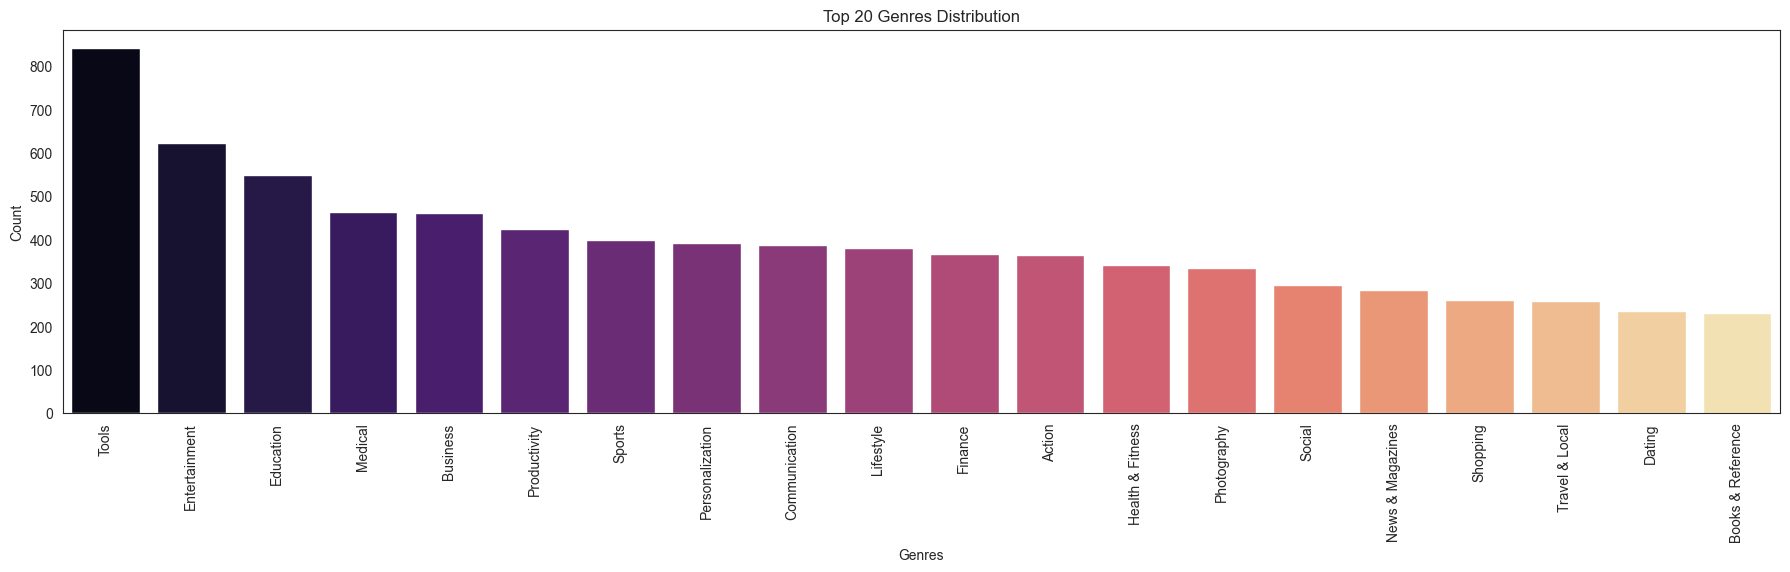

In [11]:
plt.figure(figsize=(18, 14))
plt.subplot(3, 1, 3)
genres_counts = apk['Genres'].value_counts().head(20)  # Menampilkan 20 genre teratas
sns.barplot(x=genres_counts.index, y=genres_counts.values, palette="magma")
plt.title('Top 20 Genres Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Tampilkan plot
plt.tight_layout()
plt.show()

## Data Preparation untuk CBF

Menghapus kolom tertentu untuk menyederhanakan dan hanya dengan kolom-kolom yang relevan bagi analisis

In [12]:
apk = apk.drop(columns=['Reviews', 'Size', 'Price', 'Type', 'Installs', 'Content_Rating', 'Last_Updated', 'Current_Ver', 'Android_Ver'], axis=1)
apk

,App,Category,Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Art & Design;Creativity
...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,Books & Reference


menggabungkan dua DataFrame, yaitu user dan apk  untuk mengaitkan informasi ulasan pengguna dengan data aplikasi

In [13]:
all_apk_user = pd.merge(user,  apk, on='App', how='left')
all_apk_user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Genres
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,Health & Fitness
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,Health & Fitness
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,Health & Fitness
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,Health & Fitness
4,10 Best Foods for You,NaN,NaN,NaN,NaN,HEALTH_AND_FITNESS,4.0,Health & Fitness
...,...,...,...,...,...,...,...,...
125396,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,HOUSE_AND_HOME,4.6,House & Home
125397,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,HOUSE_AND_HOME,4.6,House & Home
125398,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,HOUSE_AND_HOME,4.6,House & Home
125399,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,HOUSE_AND_HOME,4.6,House & Home


menghitung jumlah nilai kosong (null) pada all_apk_user dimana pada dataset yang sudah digabung sebelumnya

In [14]:
all_apk_user.isnull().sum()

App                           0
Translated_Review         51298
Sentiment                 51288
Sentiment_Polarity        51288
Sentiment_Subjectivity    51288
Category                   2739
Rating                     2779
Genres                     2739
dtype: int64

menghapus semua baris yang memiliki nilai kosong (null) 

In [15]:
all_apk_user_cleaned = all_apk_user.dropna()


menghapus duplikasi berdasarkan kolom App untuk memastikan bahwa analisis berikutnya tidak akan terpengaruh oleh adanya aplikasi yang sama lebih dari sekali,

In [16]:
preparation = all_apk_user_cleaned.drop_duplicates('App')
preparation

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Genres
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,Health & Fitness
440,11st,Horrible ID verification,Negative,-1.000000,1.000000,SHOPPING,3.8,Shopping
480,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000,MEDICAL,4.7,Medical
640,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762,GAME,4.6,Board
680,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Like The Old Version Better Where Backspace Is...,Positive,0.300000,0.350000,PERSONALIZATION,4.2,Personalization
...,...,...,...,...,...,...,...,...
124845,Hotels.com: Book Hotel Rooms & Find Vacation D...,Bookings stopped showing app. Helpline useless...,Positive,0.291667,0.566667,TRAVEL_AND_LOCAL,4.5,Travel & Local
125005,Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial asking credit card. Stupid!!!,Negative,-0.300000,0.900000,TOOLS,4.2,Tools
125045,Hotstar,running,Neutral,0.000000,0.000000,ENTERTAINMENT,4.3,Entertainment
125086,Hotwire Hotel & Car Rental App,The worthless. It allow see information would ...,Negative,-0.233333,0.655556,TRAVEL_AND_LOCAL,4.3,Travel & Local


 mengonversi kolom dari DataFrame preparation menjadi list kemudian mencetak panjang (len) masing-masing list tersebut untuk verifikasi

In [17]:
# Mengonversi kolom 'App' menjadi list
app_list = preparation['App'].tolist()

# Mengonversi kolom 'Translated_Review' menjadi list
translated_review_list = preparation['Translated_Review'].tolist()

# Mengonversi kolom 'Sentiment' menjadi list
sentiment_list = preparation['Sentiment'].tolist()

# Mengonversi kolom 'Sentiment_Polarity' menjadi list
sentiment_polarity_list = preparation['Sentiment_Polarity'].tolist()

# Mengonversi kolom 'Sentiment_Subjectivity' menjadi list
sentiment_subjectivity_list = preparation['Sentiment_Subjectivity'].tolist()

# Mengonversi kolom 'Category' menjadi list
category_list = preparation['Category'].tolist()

# Mengonversi kolom 'Rating' menjadi list
rating_list = preparation['Rating'].tolist()

# Mengonversi kolom 'Genres' menjadi list
genres_list = preparation['Genres'].tolist()

# Cetak panjang dari masing-masing list untuk verifikasi
print(len(app_list))
print(len(translated_review_list))
print(len(sentiment_list))
print(len(sentiment_polarity_list))
print(len(sentiment_subjectivity_list))
print(len(category_list))
print(len(rating_list))
print(len(genres_list))


816
816
816
816
816
816
816
816


membuat DataFrame baru dari kolom-kolom yang telah dikonversi menjadi list sebelumnya. menghasilkan struktur data yang terorganisir dengan baik, di mana setiap kolom mewakili informasi yang relevan tentang aplikasi dan ulasan pengguna

In [18]:
# Membuat dictionary baru dari kolom yang digunakan
apk_user_dict = pd.DataFrame({
    'App': app_list,                                 # Nama aplikasi
    'Translated_Review': translated_review_list,     # Ulasan yang telah diterjemahkan
    'Sentiment': sentiment_list,                     # Sentimen ulasan (Positif/Negatif/Netral)
    'Sentiment_Polarity': sentiment_polarity_list,   # Polaritas sentimen
    'Sentiment_Subjectivity': sentiment_subjectivity_list,  # Subjektivitas sentimen
    'Category': category_list,                       # Kategori aplikasi
    'Rating': rating_list,                           # Rating aplikasi
    'Genres': genres_list                            # Genre aplikasi
})

apk_user_dict


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Genres
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,Health & Fitness
1,11st,Horrible ID verification,Negative,-1.000000,1.000000,SHOPPING,3.8,Shopping
2,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000,MEDICAL,4.7,Medical
3,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762,GAME,4.6,Board
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Like The Old Version Better Where Backspace Is...,Positive,0.300000,0.350000,PERSONALIZATION,4.2,Personalization
...,...,...,...,...,...,...,...,...
811,Hotels.com: Book Hotel Rooms & Find Vacation D...,Bookings stopped showing app. Helpline useless...,Positive,0.291667,0.566667,TRAVEL_AND_LOCAL,4.5,Travel & Local
812,Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial asking credit card. Stupid!!!,Negative,-0.300000,0.900000,TOOLS,4.2,Tools
813,Hotstar,running,Neutral,0.000000,0.000000,ENTERTAINMENT,4.3,Entertainment
814,Hotwire Hotel & Car Rental App,The worthless. It allow see information would ...,Negative,-0.233333,0.655556,TRAVEL_AND_LOCAL,4.3,Travel & Local


menghitung dan memetakan fitur dari kolom Genres dalam DataFrame apk_user_dict menggunakan metode TF-IDF. TF-IDF membantu dalam mengidentifikasi seberapa penting suatu kata dalam koleksi dokumen. 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer  = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data 'Genres'
tfidf_vectorizer.fit(apk_user_dict['Genres']) 
 
# Mapping array dari fitur index integer ke fitur nama
tfidf_vectorizer.get_feature_names_out() 

array(['action', 'adventure', 'arcade', 'art', 'auto', 'beauty', 'board',
       'books', 'brain', 'business', 'casual', 'comics', 'communication',
       'creativity', 'dating', 'demo', 'design', 'drink', 'editors',
       'education', 'educational', 'entertainment', 'events', 'finance',
       'fitness', 'food', 'games', 'health', 'home', 'house', 'libraries',
       'lifestyle', 'local', 'magazines', 'maps', 'medical', 'music',
       'navigation', 'news', 'parenting', 'personalization',
       'photography', 'play', 'players', 'playing', 'pretend',
       'productivity', 'puzzle', 'racing', 'reference', 'role',
       'shopping', 'simulation', 'social', 'sports', 'strategy', 'tools',
       'travel', 'vehicles', 'video', 'weather'], dtype=object)

## Model Development dengan Content Based Filtering

melakukan transformasi data kolom Genres menjadi matriks TF-IDF dan memeriksa ukuran matriks tersebut untuk memahami dimensi dari data yang telah diproses, serta untuk memastikan bahwa transformasi berhasil dan matriks memiliki ukuran yang sesuai untuk analisis atau pemodelan selanjutnya.

In [20]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(apk_user_dict['Genres']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(816, 61)

mengubah matriks TF-IDF yang awalnya dalam bentuk sparse menjadi bentuk dense untuk melakukan analisis lebih lanjut atau memvisualisasikan data

In [21]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix_dense = tfidf_matrix.todense()
tfidf_matrix_dense

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

membuat DataFrame dari matriks TF-IDF yang telah diubah menjadi bentuk dense, sehingga memungkinkan untuk melihat nilai-nilai TF-IDF dengan lebih mudah, memvisualisasikan dan menganalisis data TF-IDF dengan cara yang lebih terstruktur.

In [22]:
# Membuat dataframe untuk melihat tf-idf matrix

# Membuat DataFrame untuk melihat tf-idf matrix
tfidf_df = pd.DataFrame(
    tfidf_matrix_dense, 
    columns=tfidf_vectorizer.get_feature_names_out(), 
    index=apk_user_dict['Genres'],
)

# Tampilkan matriks tf-idf
tfidf_df.sample(22, axis=1).sample(10, axis=0)


,playing,action,creativity,vehicles,pretend,travel,lifestyle,video,play,music,...,local,libraries,events,business,house,news,fitness,shopping,auto,magazines
Genres,,,,,,,,,,,,,,,,,,,,,
Casual,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Photography,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Action,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
House & Home,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0
Racing;Action & Adventure,0.0,0.486468,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Puzzle,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Travel & Local,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,...,0.707107,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Tools,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Lifestyle,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


menghitung cosine similarity antara dokumen-dokumen dalam matriks TF-IDF yang telah dibuat.

Cosine similarity adalah metrik yang umum digunakan dalam analisis teks untuk mengukur seberapa mirip dua teks berdasarkan sudut antara vektor-vektor mereka dalam ruang fitur. 

In [23]:
# Menghitung cosine similarity pada matrix tf-idf
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

menghitung ulang matriks TF-IDF dan cosine similarity untuk menganalisis kemiripan dokumen dalam konteks subset tertentu dari data

In [24]:

# Menghitung ulang TF-IDF untuk subset data
tfidf_matrix_subset = tfidf_vectorizer.fit_transform(apk_user_dict['Genres'])

# Menghitung cosine similarity pada subset matrix
cosine_sim_subset = cosine_similarity(tfidf_matrix_subset)

# Menampilkan ukuran matrix cosine similarity
print('Cosine Similarity Matrix Shape:', cosine_sim_subset.shape)


Cosine Similarity Matrix Shape: (816, 816)


membuat DataFrame dari matriks cosine similarity yang telah dihitung dan memvisualisasikan hasilnya dengan cara yang lebih terstruktur. 

In [25]:
# Membuat dataframe dari variabel cosine_sim_subset dengan baris dan kolom dari subset App
cosine_sim_df = pd.DataFrame(cosine_sim_subset, 
                             index=apk_user_dict['App'], 
                             columns=apk_user_dict['App'])

# Menampilkan ukuran matrix
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix secara acak untuk 7 kolom dan 10 baris
cosine_sim_df.sample(7, axis=1).sample(10, axis=0)


Shape: (816, 816)


App,DuraSpeed,Grim Soul: Dark Fantasy Survival,Home Workout - No Equipment,"BestCam Selfie-selfie, beauty camera, photo editor",Files Go by Google: Free up space on your phone,Coloring & Learn,Google My Business
App,,,,,,,
Evie Launcher,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACE Elite,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Choice Hotels,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"DU Recorder – Screen Recorder, Video Editor, Live",0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brain Waves - Binaural Beats,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Baritastic - Bariatric Tracker,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Easy Installer - Apps On SD,0.0,0.0,0.0,0.0,0.0,0.0,1.0
GoBank,0.0,0.0,0.0,0.0,0.0,0.0,0.0


memberikan rekomendasi aplikasi berdasarkan kemiripan cosine antara aplikasi yang diberikan.

In [26]:
def apk_recommendations_based(name_apk, similarity_data=cosine_sim_df, items=apk_user_dict[['App', 'Genres', 'Rating', 'Sentiment_Polarity', 'Sentiment_Subjectivity', 'Sentiment']], n=10):
    # Mencari index game yang mirip berdasarkan cosine similarity
    similar_apk = similarity_data[name_apk].nlargest(n + 1).index
    
    # Drop game yang sama dari daftar rekomendasi
    similar_apk = similar_apk.drop(name_apk, errors='ignore')

    # Mengambil data rekomendasi
    recommendations = items[items['App'].isin(similar_apk)]
    
    # Mengurutkan berdasarkan Rating
    recommendations = recommendations.sort_values(by='Rating', ascending=False)
    
    return recommendations.head(n)


mengambil input dari pengguna dan kemudian menggunakan fungsi apk_recommendations_based untuk memberikan rekomendasi aplikasi berdasarkan input tersebut.

In [28]:
from tabulate import tabulate

# Mengambil input dari user
name_apk_input = input("Masukkan nama APK yang ingin direkomendasikan: ")
recommendations = apk_recommendations_based(name_apk_input)

# Menampilkan hasil dengan input di bagian atas
print(f"\nRekomendasi untuk APK '{name_apk_input}':")
print(tabulate(recommendations, headers='keys', tablefmt='github', showindex=False))


Rekomendasi untuk APK 'GoBank':
| App                            | Genres   |   Rating |   Sentiment_Polarity |   Sentiment_Subjectivity | Sentiment   |
|--------------------------------|----------|----------|----------------------|--------------------------|-------------|
| Associated Credit Union Mobile | Finance  |      4.7 |           -0.0555556 |                 0.244444 | Negative    |
| BZWBK24 mobile                 | Finance  |      4.5 |           -0.0443452 |                 0.480357 | Negative    |
| Bank of America Mobile Banking | Finance  |      4.4 |           -0.0717172 |                 0.253535 | Negative    |
| Acorns - Invest Spare Change   | Finance  |      4.3 |            0.283333  |                 0.469444 | Positive    |
| Amex Mobile                    | Finance  |      4.3 |            0.275     |                 0.55     | Positive    |
| BBVA Compass Banking           | Finance  |      4.3 |            1         |                 0.3      | Positive    |

menghitung dan menampilkan nilai precision dari rekomendasi aplikasi berdasarkan sentimen positif

In [29]:
# Mendefinisikan aplikasi relevan (ground truth) sebagai aplikasi dengan Sentiment positif
relevant_apks = set(preparation['App'])

# Mendapatkan nama aplikasi yang direkomendasikan dalam bentuk set
recommended_apks = set(recommendations['App'])

# Menghitung Precision dan Recall
true_positives = len(recommended_apks.intersection(relevant_apks))
precision = true_positives / len(recommended_apks) if recommended_apks else 0

print(f"\nPrecision: {precision:.2f}")



Precision: 1.00


### Penutup CBF

Hasil dari proses ini memberikan insight berupa aplikasi alternatif dengan fungsi atau kategori serupa, sehingga pengguna dapat menemukan opsi aplikasi yang sesuai dengan kebutuhan mereka.

## Model Development dengan Collaborative Filtering

### Data Preparation (dataset yang dipakai hanya user review)

menampilkan ringkasan informasi  dari user

In [30]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


menghitung jumlah nilai kosong (null) di setiap kolom pada user

In [31]:
user.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

menghapus semua baris dalam yang memiliki nilai NaN

In [32]:
user_clean = user.dropna()

In [33]:
user_clean

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


 membagi dataset ulasan aplikasi yang telah dibersihkan menjadi train set dan test set (80:20), Mengubah train_data menjadi tabel pivot kemudian kolom yang akan dihitung adalah Sentiment_Polarity dan Sentiment_Subjectivity.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Pisahkan dataset menjadi train dan test set
train_data, test_data = train_test_split(user_clean, test_size=0.2, random_state=42)

# Buat pivot table dari train_data untuk membentuk matriks item similarity berdasarkan Sentiment_Polarity 
item_matrix_train = train_data.pivot_table(index='App', values=['Sentiment_Polarity', 'Sentiment_Subjectivity'], aggfunc='mean')



### Modeling CF

Membangun model K-Nearest Neighbors (KNN) untuk menemukan aplikasi yang mirip

In [35]:

# Menggunakan K-Nearest Neighbors untuk mencari kemiripan antar aplikasi
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(item_matrix_train)

NearestNeighbors(algorithm='brute', metric='cosine')

memberikan rekomendasi aplikasi yang mirip berdasarkan model K-Nearest Neighbors dengan jumlah yang direkomendasikan yaitu 5

In [36]:
# Fungsi untuk mencari aplikasi mirip
def find_similar_items_knn(app_name, item_matrix_train, model, n=5):
    if app_name in item_matrix_train.index:
        # Mendapatkan indeks aplikasi yang diberikan
        idx = item_matrix_train.index.get_loc(app_name)
        distances, indices = model.kneighbors(item_matrix_train.iloc[idx, :].values.reshape(1, -1), n_neighbors=n+1)
        
        # Ambil hasil dalam bentuk DataFrame untuk aplikasi yang mirip
        similar_apps = pd.DataFrame({
            'Aplikasi': item_matrix_train.index[indices.flatten()],
            'Jarak': distances.flatten()
        }).sort_values(by='Jarak').iloc[1:]  # Hilangkan aplikasi itu sendiri dari hasil
        
        return similar_apps
    else:
        raise ValueError(f"Aplikasi '{app_name}' tidak ditemukan dalam data.")

menganalisis sentimen aplikasi berdasarkan input dari pengguna

List rekomendasi diurutkan berdasarkan Sentiment_Polarity dari yang tertinggi ke terendah

In [44]:
# Input aplikasi dari pengguna
app_input = input("Masukkan nama aplikasi: ")

try:
    # Menampilkan Sentiment Polarity dan Subjectivity rata-rata dari aplikasi yang dimasukkan pengguna
    user_app_polarity = train_data[train_data['App'] == app_input]['Sentiment_Polarity'].mean()
    user_app_subjectivity = train_data[train_data['App'] == app_input]['Sentiment_Subjectivity'].mean()
    
    if pd.isna(user_app_polarity) or pd.isna(user_app_subjectivity):
        raise ValueError(f"Aplikasi '{app_input}' tidak ditemukan dalam data pelatihan.")
    
    # Tampilkan Sentiment Polarity dan Subjectivity dari aplikasi input
    print(f"\nSentiment Polarity rata-rata dari aplikasi '{app_input}': {user_app_polarity:.4f}")
    print(f"Sentiment Subjectivity rata-rata dari aplikasi '{app_input}': {user_app_subjectivity:.4f}")
    
    # Cari aplikasi yang mirip dengan KNN
    recommendations = find_similar_items_knn(app_input, item_matrix_train, knn)
    
    # List untuk menyimpan data aplikasi dan rata-rata sentimen
    app_data = []
    
    print(f"\nRekomendasi aplikasi yang mirip dengan '{app_input}':")
    
    for _, row in recommendations.iterrows():
        app_name = row['Aplikasi']
        avg_polarity = train_data[train_data['App'] == app_name]['Sentiment_Polarity'].mean()
        avg_subjectivity = train_data[train_data['App'] == app_name]['Sentiment_Subjectivity'].mean()
        
        # Tambahkan data aplikasi ke dalam list
        app_data.append([app_name, avg_polarity, avg_subjectivity])
    
    # Urutkan aplikasi berdasarkan Sentiment Polarity dari tertinggi ke terendah
    app_data_sorted = sorted(app_data, key=lambda x: x[1], reverse=True)

   # Menghitung panjang maksimum nama aplikasi
    max_app_length = max(len(row['Aplikasi']) for _, row in recommendations.iterrows())
    # Tambahkan padding jika perlu
    max_app_length = max(max_app_length, 27)  # Set minimal lebar 27 jika lebih kecil

    # Menampilkan hasil dalam format tabel Markdown
    print("\n| Aplikasi" + " " * (max_app_length - 8) + "| Sentiment Polarity | Sentiment Subjectivity |")
    print("|" + "-" * (max_app_length + 2) + "|-------------------|-----------------------|")
    for app_name, polarity, subjectivity in app_data_sorted:
        print(f"| {app_name:<{max_app_length}} | {polarity:>17.4f} | {subjectivity:>21.4f} |")
        
except ValueError as e:
    print(e)



Sentiment Polarity rata-rata dari aplikasi 'Blogger': 0.1187
Sentiment Subjectivity rata-rata dari aplikasi 'Blogger': 0.5304

Rekomendasi aplikasi yang mirip dengan 'Blogger':

| Aplikasi                     | Sentiment Polarity | Sentiment Subjectivity |
|-------------------------------|-------------------|-----------------------|
| AMC Theatres                  |            0.1378 |                0.6063 |
| Banorte Movil                 |            0.1363 |                0.6059 |
| Chapters: Interactive Stories |            0.1105 |                0.5013 |
| Cool Reader                   |            0.1091 |                0.4825 |
| Baby Panda’s Juice Shop       |            0.1083 |                0.4917 |


C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


memprediksi nilai sentimen rata-rata (polarity dan subjectivity) dari aplikasi menggunakan algoritma K-Nearest Neighbors (KNN) dan kemudian menghitung error metrik dengan Root Mean Squared Error (RMSE) 

In [38]:
from sklearn.metrics import mean_squared_error

# Fungsi untuk menemukan aplikasi mirip dan memprediksi sentimen rata-rata
def predict_sentiment_knn(app_name, item_matrix_train, model, train_data, n=5):
    if app_name in item_matrix_train.index:
        # Cari n aplikasi mirip
        idx = item_matrix_train.index.get_loc(app_name)
        distances, indices = model.kneighbors(item_matrix_train.iloc[idx, :].values.reshape(1, -1), n_neighbors=n+1)
        
        # Ambil aplikasi yang mirip dan hitung rata-rata polarity dan subjectivity
        similar_apps = item_matrix_train.index[indices.flatten()[1:]]  # Hilangkan aplikasi itu sendiri dari hasil
        pred_polarity = train_data[train_data['App'].isin(similar_apps)]['Sentiment_Polarity'].mean()
        pred_subjectivity = train_data[train_data['App'].isin(similar_apps)]['Sentiment_Subjectivity'].mean()
        
        return pred_polarity, pred_subjectivity
    else:
        # Jika tidak ada aplikasi yang mirip, gunakan default (misalnya 0)
        return 0, 0

# Menghitung nilai sebenarnya dari test set
y_true_polarity = test_data['Sentiment_Polarity'].values

# Prediksi polarity dan subjectivity pada test set
y_pred_polarity = []

for app in test_data['App']:
    pred_polarity, pred_subjectivity = predict_sentiment_knn(app, item_matrix_train, knn, train_data)
    y_pred_polarity.append(pred_polarity)

# Menghitung Root Mean Squared Error (RMSE) dan Mean Absolute Error (MAE) untuk Sentiment_Polarity
rmse_polarity = mean_squared_error(y_true_polarity, y_pred_polarity, squared=False)


print(f"Root Mean Squared Error (Polarity): {rmse_polarity}")


C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWa

Root Mean Squared Error (Polarity): 0.3315518816226507


C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\jstwy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWa

### Penutup CF

Hasil proses ini memberikan gambaran mengenai aplikasi yang memiliki sentimen positif tinggi, sekaligus membantu pengguna menemukan alternatif dengan sentimen pengguna serupa atau lebih baik. Dari eksplorasi ini, insight mengenai seberapa subjektif atau objektif sentimen pada aplikasi dapat diperoleh, serta apakah aplikasi tersebut memiliki kesan positif secara umum berdasarkan urutan dari Sentiment Polarity.